In [2]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [9]:
np.shape(X_train[0])

(28, 28)

In [10]:
type(X_train[0])

numpy.ndarray

In [31]:
x = np.array(X_train[0])
np.shape(x)

(28, 28)

In [32]:

# x = x.reshape((1,1,X_train[0].shape[0], X_train[0].shape[1]))
x = x[np.newaxis, np.newaxis, :, :]  # (1, 1, 28, 28)
print("Reshaped x:", np.shape(x))

Reshaped x: (1, 1, 28, 28)


In [29]:
a = np.array([1, 2, 3, 4])
print(f"a: {a}, shape a: {np.shape(a)}")
print(f"Type of a: {type(a)}")
row_a = a[np.newaxis, :]
print(f"\nReshaped 1 row a: {row_a}, shape row_a: {np.shape(row_a)}")
row_a = a.reshape((1, -1))  # Reshape to a row vector
print(f"\nReshaped 2 row a: {row_a}, shape row_a: {np.shape(row_a)}")


col_a = a[:, np.newaxis]
print(f"\nReshaped 1 col a: \n{col_a}, shape col_a: {np.shape(col_a)}")
col_a = a.reshape((-1, 1))  # Reshape to a column vector
print(f"\nReshaped 2 col a: \n{col_a}, shape col_a: {np.shape(col_a)}")

a: [1 2 3 4], shape a: (4,)
Type of a: <class 'numpy.ndarray'>

Reshaped 1 row a: [[1 2 3 4]], shape row_a: (1, 4)

Reshaped 2 row a: [[1 2 3 4]], shape row_a: (1, 4)

Reshaped 1 col a: 
[[1]
 [2]
 [3]
 [4]], shape col_a: (4, 1)

Reshaped 2 col a: 
[[1]
 [2]
 [3]
 [4]], shape col_a: (4, 1)


In [27]:
b = np.array([[1,2,3,4]])
print(f"b: \n{b}, shape b: {np.shape(b)}")
# Reshape b to a column vector
b_col = b.reshape((-1, 1))  # Reshape to a column vector
print(f"Reshaped b_col: \n{b_col}, shape b_col: {np.shape(b_col)}")
b_col = b[:, np.newaxis]  # Another way to reshape to a column vector
print(f"Reshaped b_col: \n{b_col}, shape b_col: {np.shape(b_col)}")

# # Reshape b to a row vector
# b_row = b.reshape((1, -1))  # Reshape to a row vector

b: 
[[1 2 3 4]], shape b: (1, 4)
Reshaped b_col: 
[[1]
 [2]
 [3]
 [4]], shape b_col: (4, 1)
Reshaped b_col: 
[[[1 2 3 4]]], shape b_col: (1, 1, 4)


In [33]:
# 2. 필터 정의
horizontal_filter = np.array([[-1, -1, -1],
                              [ 2,  2,  2],
                              [-1, -1, -1]])
vertical_filter = np.array([[-1, 2, -1],
                            [-1, 2, -1],
                            [-1, 2, -1]])

In [34]:
W = np.stack([horizontal_filter, vertical_filter])  # (2, 3, 3)
print(f"W: \n{W}, shape W: {np.shape(W)}")
print(f"Type of W: {type(W)}")

W: 
[[[-1 -1 -1]
  [ 2  2  2]
  [-1 -1 -1]]

 [[-1  2 -1]
  [-1  2 -1]
  [-1  2 -1]]], shape W: (2, 3, 3)
Type of W: <class 'numpy.ndarray'>


In [35]:
W = W[:, np.newaxis, :, :]  # (2, 1, 3, 3)
print(f"Reshaped W: \n{W}, shape W: {np.shape(W)}")

Reshaped W: 
[[[[-1 -1 -1]
   [ 2  2  2]
   [-1 -1 -1]]]


 [[[-1  2 -1]
   [-1  2 -1]
   [-1  2 -1]]]], shape W: (2, 1, 3, 3)


In [37]:
b = np.zeros(2)
print(f"b: {b}, shape b: {np.shape(b)}")

b: [0. 0.], shape b: (2,)


In [38]:
from common.layers import Convolution
# 3. Convolution 계층 적용
Conv = Convolution(W, b, stride=1, pad=1)  # pad=1로 출력 크기 유지
out = Conv.forward(x)

print("합성곱 결과 shape:", out.shape)
print("가로선 필터 결과 (0번):")
print(out[0, 0])
print("세로선 필터 결과 (1번):")
print(out[0, 1])

합성곱 결과 shape: (1, 2, 28, 28)
가로선 필터 결과 (0번):
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -3.
   -21.  -39.  -54. -162. -280. -437. -337. -367. -447. -668. -629. -374.
  -127.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  -30.  -66. -160. -284. -412.
  -535

In [45]:
print(f"출력의 shape: {np.shape(out)}")
print(f"출력의 타입: {type(out)}")
print(np.shape(out[0]))
print(f"가로선 추출 결과 shape: {np.shape(out[0, 0])}")
print(f"세로선 추출 결과 shape: {np.shape(out[0, 1])}")

출력의 shape: (1, 2, 28, 28)
출력의 타입: <class 'numpy.ndarray'>
(2, 28, 28)
가로선 추출 결과 shape: (28, 28)
세로선 추출 결과 shape: (28, 28)


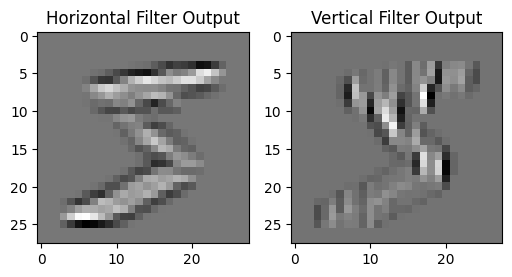

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plt.imshow(out[0, 0], cmap='gray')
plt.title('Horizontal Filter Output')
plt.subplot(1, 2, 2)
plt.imshow(out[0, 1], cmap='gray')
plt.title('Vertical Filter Output')
plt.show()

In [ ]:
import numpy as np
from common.layers import Convolution

W = np.random.randn(3, 1, 3, 3)
b = np.zeros(3)

Conv = Convolution(W, b, stride=1, pad=0)

print(f"신경망 구조: {Conv}")
print(f"가중치 W: {Conv.W.shape}, 편향 b: {Conv.b.shape}")
print(f"가중치 W: {Conv.W}, 편향 b: {Conv.b}")

x = np.random.randn(1, 1, 5, 5)

